# Import Libraries, Set Path, Importing Data frame.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
path = r'C:\Users\Chaot\Python stuff\06 - Utah Real Estate Housing Prices'
clean_cities = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'Utah Housing Datasets','cleaned_cities.csv'), index_col = False)

# Cleaning Data.

In [3]:
#Changing Data types and clearing NA's.
clean_cities['price'] = clean_cities['price'].astype(int)
clean_cities['bedrooms'] = clean_cities['bedrooms'].fillna(0).astype(int)
clean_cities['bathrooms'] = clean_cities['bathrooms'].fillna(0).astype(int)
clean_cities['zestimate'] = clean_cities['zestimate'].fillna(0).astype(int)
clean_cities['tax_assessed_value'] = clean_cities['tax_assessed_value'].fillna(0).astype(int)
clean_cities['new_home'] = clean_cities['new_home'].fillna(False).astype(bool)
clean_cities['living_area'] = clean_cities['living_area'].fillna(0)
clean_cities['construction_type'] = clean_cities['construction_type'].fillna('Not new home').astype(str)

In [4]:
clean_cities.isnull().sum()

zpid                  0
city                  0
state                 0
zipcode               0
latitude              0
longitude             0
price                 0
bathrooms             0
bedrooms              0
living_area           0
home_type             0
zestimate             0
country               0
tax_assessed_value    0
new_home              0
construction_type     0
home_detail_link      0
dtype: int64

In [5]:
dupes = clean_cities.duplicated()
dupes.shape

(3759,)

# Scatterplot

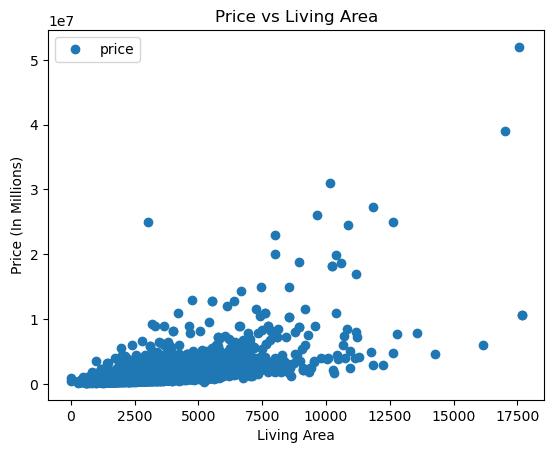

In [6]:
clean_cities.plot(x='living_area',y='price',style = 'o')
plt.title('Price vs Living Area')
plt.xlabel('Living Area')
plt.ylabel('Price (In Millions)')
plt.show()

## Hypothesis

Looking at the scatterplot above, as the living area increases, the price of the home should increase as well. From what we found in previous experiments, as the living area increases both bedrooms and bathrooms increase.

# Splitting data into NumPy Arrays.

In [7]:
x = clean_cities['living_area'].values.reshape(-1,1)
y = clean_cities['price'].values.reshape(-1,1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 0)

In [9]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [10]:
y_predicted = regression.predict(x_test)

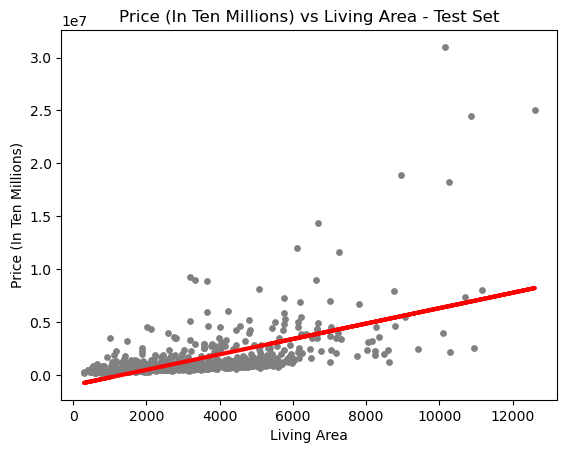

In [11]:
plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s=15)
plot_test.plot(x_test, y_predicted, color ='red', linewidth=3)
plot_test.title('Price (In Ten Millions) vs Living Area - Test Set')
plot_test.xlabel('Living Area')
plot_test.ylabel('Price (In Ten Millions)')
plot_test.savefig(os.path.join(path, 'Visualizations', '1. Price & Living Area Linear Regression Test.png'),bbox_inches='tight')
plot_test.show()

In [12]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [13]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[728.19941817]]
Mean squared error:  2673607338673.3096
R2 score:  0.3302922176948372


### Y Prediction for Test.

In [14]:
y_predicted

array([[-258426.57341464],
       [-357461.69428625],
       [ 193057.06585302],
       ...,
       [ 672212.28301128],
       [ 405691.29595972],
       [2988614.63222164]])

In [15]:
a_v_p = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
a_v_p.head(15)

,Actual,Predicted
0,210000,-2.584266e+05
1,325000,-3.574617e+05
2,437900,1.930571e+05
3,727368,4.748702e+05
4,379900,1.337787e+06
5,524900,9.168873e+05
6,515000,2.746154e+05
7,398743,4.683164e+05
8,639900,5.979359e+05
9,569000,4.552089e+05


In [16]:
y_predicted_train = regression.predict(x_train)

In [17]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [18]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[728.19941817]]
Mean squared error:  3304000507295.278
R2 score:  0.36814862325935616


### Regression Line for Test set.

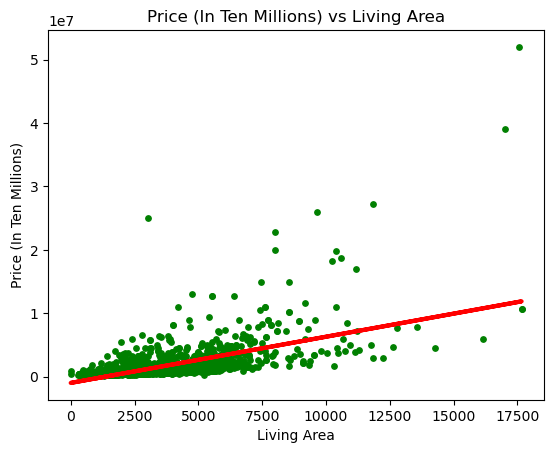

In [19]:
plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price (In Ten Millions) vs Living Area')
plot_test.xlabel('Living Area')
plot_test.ylabel('Price (In Ten Millions)')
plt.savefig(os.path.join(path, 'Visualizations', '1. Price & Living Area Linear Regression Train.png'),bbox_inches='tight')
plot_test.show()

Viewing the line in the above plot seems to confirm our hypothesis that as Living area increases, price should increase as well. Whats surprising is that there are some with large amounts of living area that are not high in price (above our line). These could probably be considered outliers and are more than likely not very true to Utah's housing market. When we look at this same test without our high outliers down below, we can see without our outliers that it is definitely strong.

# Retest with no High Outlier

Our Q1 is 475,000 and our Q3 is 1,100,000. This leads to an IQR of 625,000. To remove our high outliers, we take do Q3 +(1.5*625,00) to equal 2,037,500.

In [20]:
#New dataframe excluding high outliers price.
no_high_out = clean_cities[clean_cities['price'] <= 2037500]

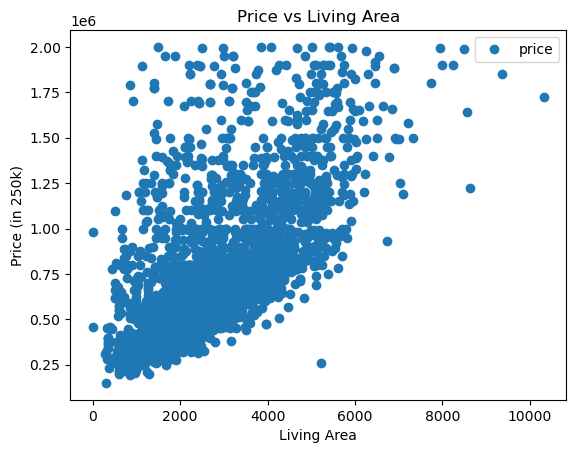

In [21]:
no_high_out.plot(x='living_area',y='price',style = 'o')
plt.title('Price vs Living Area')
plt.xlabel('Living Area')
plt.ylabel('Price (in 250k)')
plt.show()

In [22]:
x2 = no_high_out['living_area'].values.reshape(-1,1)
y2 = no_high_out['price'].values.reshape(-1,1)

In [23]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.3, random_state = 0)

In [24]:
regression = LinearRegression()
regression.fit(x2_train, y2_train)

LinearRegression()

In [25]:
y2_predicted = regression.predict(x2_test)

In [26]:
rmse2 = mean_squared_error(y2_test, y2_predicted)
r2_2 = r2_score(y2_test, y2_predicted)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2_2)

Slope: [[185.74043578]]
Mean squared error:  84617536175.93103
R2 score:  0.4226096820418238


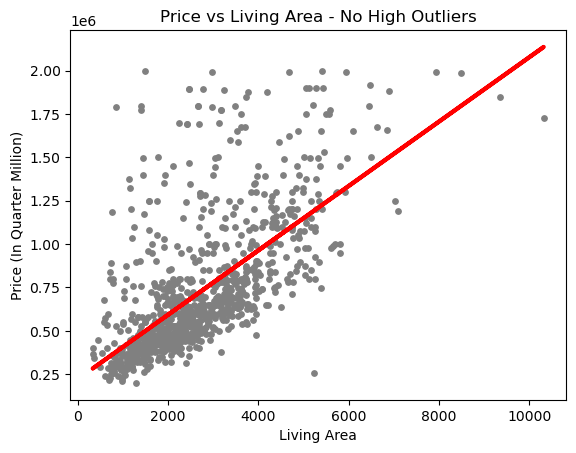

In [36]:
plot_test = plt
plot_test.scatter(x2_test, y2_test, color='gray', s=15)
plot_test.plot(x2_test, y2_predicted, color ='red', linewidth=3)
plot_test.title('Price vs Living Area - No High Outliers')
plot_test.xlabel('Living Area')
plot_test.ylabel('Price (In Quarter Million)')
plt.savefig(os.path.join(path, 'Visualizations', '2. Price & Living Area Linear Regression Test - No High Outliers.png'),bbox_inches='tight')
plot_test.show()

In [29]:
a_v_p2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
a_v_p2.head(15)

,Actual,Predicted
0,660000,5.872753e+05
1,1299000,1.287517e+06
2,494900,6.608285e+05
3,650000,8.887320e+05
4,589000,6.805170e+05
5,685000,5.921045e+05
6,999900,1.280087e+06
7,888000,1.003891e+06
8,899000,1.018379e+06
9,500000,7.146932e+05


In [30]:
y2_predicted_train = regression.predict(x2_train)

In [31]:
rmse = mean_squared_error(y2_train, y2_predicted_train)
r2_2 = r2_score(y2_train, y2_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2_2)

Slope: [[185.74043578]]
Mean squared error:  67679124570.02692
R2 score:  0.46649049516079333


## Regression Line Test for No High Outliers.

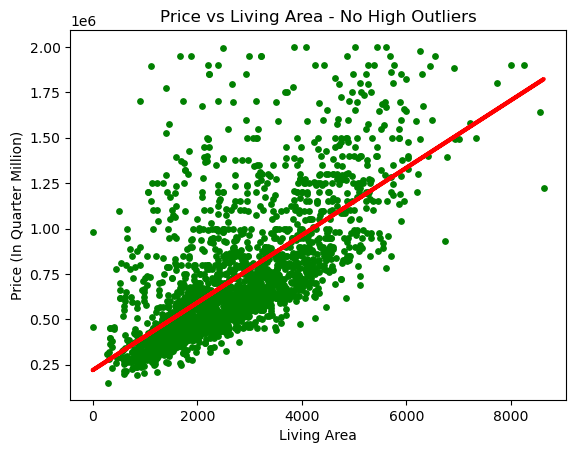

In [33]:
plot_test = plt
plot_test.scatter(x2_train, y2_train, color='green', s = 15)
plot_test.plot(x2_train, y2_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Living Area - No High Outliers')
plot_test.xlabel('Living Area')
plot_test.ylabel('Price (In Quarter Million)')
plt.savefig(os.path.join(path, 'Visualizations', '2. Price & Living Area Linear Regression Train - No High Outlier.png'),bbox_inches='tight')
plot_test.show()

# R2 MSE comparisons.

Training w/ High Outlier:  
    --Slope: [[728.19941817]]    
    --Mean squared error:  2673607338673.3096    
    --R2 score:  0.3302922176948372

Test w/ High Outlier:  
    --Slope: [[728.19941817]]    
    --Mean squared error:  3304000507295.278    
    --R2 score:  0.36814862325935616

____________________________________________________

Training w/o High Outlier:  
    --Slope: [[185.74043578]]    
    --Mean squared error:  84617536175.93103    
    --R2 score:  0.4226096820418238

Test w/o High Outlier:  
    --Slope: [[185.74043578]]    
    --Mean squared error: 67679124570.02692    
    --R2 score: 0.46649049516079333

_____

Upon examining our R2 and MSEs, we see that the R2 score for Test W/O High Outlier is roughly 42%. Our Test w/ High Outlier sits at 36%. Although our test without high outliers is higher than our test with high outliers, it still sits below 50% which isn't really that great. This means that there is a 58% variance difference that is not explained by Price and Living area for our test without high outliers and 64% for our test with outliers. Our MSE's are relatively high for all three. We can assume that these are not a good fit.

# Comparing Predicted Y Values.

In [34]:
a_v_p['Predicted'] = a_v_p['Predicted'].astype(int)
a_v_p.head(15)

,Actual,Predicted
0,210000,-258426
1,325000,-357461
2,437900,193057
3,727368,474870
4,379900,1337786
5,524900,916887
6,515000,274615
7,398743,468316
8,639900,597935
9,569000,455208


In [35]:
a_v_p2['Predicted'] = a_v_p2['Predicted'].astype(int)
a_v_p2.head(15)

,Actual,Predicted
0,660000,587275
1,1299000,1287516
2,494900,660828
3,650000,888731
4,589000,680516
5,685000,592104
6,999900,1280087
7,888000,1003891
8,899000,1018378
9,500000,714693


When observing our intitial 'Area vs Price Predicted vs Actual Y values', we see a very big difference from the actual and predicted amounts. Our 'Area vs Price Predicted vs Actual Y values without outliers' though looks pretty good with the predicted coming very close to the actual values. There is a difference with the second set, however, it isn't as great as the first.